In [36]:
# Import Necessary Packages

from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from tqdm.notebook import tqdm
from imutils import paths
import numpy as np
import os

In [37]:
# Load Images

images = list(paths.list_images("dataset"))
x = []
Y = []

for image in tqdm(images, desc="Processing Images "):
    label = image.split(os.path.sep)[-2]
    
    img = load_img(image, target_size=(100,100))
    img = img_to_array(img)
    img = preprocess_input(img)
    
    x.append(img)
    Y.append(label)

/home/ashay/.local/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [38]:
x_arr = np.array(x, dtype='float32')
Y_arr = np.array(Y)
print(x_arr.shape)
print(Y_arr.shape)

(3833, 100, 100, 3)
(3833,)


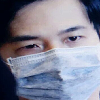

In [48]:
# Unrolling Images

test = array_to_img(x_arr[np.random.randint(3833), :, :, :], scale=True)
test

In [49]:
# Processing target Labels to One-Hot Encoding

binarizer = LabelBinarizer()
y_arr = binarizer.fit_transform(Y_arr)
y_arr = to_categorical(y_arr)
print(y_arr.shape)

(3833, 2)


In [50]:
np.save('X_RAW.npy', x_arr)
np.save('Y_RAW.npy', y_arr)
print("Raw Data Saved to disc")

Raw Data Saved to disc
